**Imports**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Chicago ###

**Reading In Data**

In [2]:
chi_df = pd.read_csv('./working_data_DEL_LATER/chi_accidents.csv')

In [17]:
chi_df.head(3)

,severity,start_time,end_time,start_lat,start_lng,end_lat,end_lng,distance(mi),description,number,...,roundabout,station,stop,traffic_calming,traffic_signal,turning_loop,sunrise_sunset,civil_twilight,nautical_twilight,astronomical_twilight
0,2,2016-11-30 14:46:48,2016-11-30 20:46:48,42.305960,-87.960150,42.306916,-87.960918,0.077,Between IL-137/Buckley Rd/Peterson Rd and IL-1...,NaN,...,False,False,False,False,True,False,Day,Day,Day,Day
1,2,2016-11-30 14:58:59,2016-11-30 20:58:59,42.175870,-88.135770,42.174620,-88.135794,0.086,At US-14/Northwest Hwy - Accident.,21500.0,...,False,False,False,False,True,False,Day,Day,Day,Day
2,3,2016-11-30 15:14:24,2016-11-30 21:29:48,42.175897,-88.135769,42.174612,-88.135794,0.089,Between IL-22 and US-14/Northwest Hwy - Accident.,21501.0,...,False,False,False,False,True,False,Day,Day,Day,Day


In [4]:
chi_df.columns

Index(['id', 'severity', 'start_time', 'end_time', 'start_lat', 'start_lng',
       'end_lat', 'end_lng', 'distance(mi)', 'description', 'number', 'street',
       'side', 'city', 'county', 'state', 'zipcode', 'country', 'timezone',
       'airport_code', 'weather_timestamp', 'temperature(f)', 'wind_chill(f)',
       'humidity(%)', 'pressure(in)', 'visibility(mi)', 'wind_direction',
       'wind_speed(mph)', 'precipitation(in)', 'weather_condition', 'amenity',
       'bump', 'crossing', 'give_way', 'junction', 'no_exit', 'railway',
       'roundabout', 'station', 'stop', 'traffic_calming', 'traffic_signal',
       'turning_loop', 'sunrise_sunset', 'civil_twilight', 'nautical_twilight',
       'astronomical_twilight'],
      dtype='object')

In [5]:
chi_df.shape

(42472, 47)

In [6]:
chi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42472 entries, 0 to 42471
Data columns (total 47 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     42472 non-null  object 
 1   severity               42472 non-null  int64  
 2   start_time             42472 non-null  object 
 3   end_time               42472 non-null  object 
 4   start_lat              42472 non-null  float64
 5   start_lng              42472 non-null  float64
 6   end_lat                42472 non-null  float64
 7   end_lng                42472 non-null  float64
 8   distance(mi)           42472 non-null  float64
 9   description            42472 non-null  object 
 10  number                 15879 non-null  float64
 11  street                 42472 non-null  object 
 12  side                   42472 non-null  object 
 13  city                   42471 non-null  object 
 14  county                 42472 non-null  object 
 15  st

In [7]:
chi_df.isna().sum().sort_values(ascending = False)[:20]

number                   26593
precipitation(in)        23129
wind_chill(f)            16332
wind_speed(mph)           2024
wind_direction             310
humidity(%)                244
visibility(mi)             120
temperature(f)             119
weather_condition          116
pressure(in)                68
weather_timestamp           64
timezone                     2
airport_code                 2
nautical_twilight            1
civil_twilight               1
sunrise_sunset               1
astronomical_twilight        1
city                         1
country                      0
give_way                     0
dtype: int64

In [8]:
chi_df[['number']]

,number
0,NaN
1,21500.0
2,21501.0
3,1194.0
4,7899.0
...,...
42467,NaN
42468,NaN
42469,3799.0
42470,NaN


In [9]:
chi_df.drop(columns = 'id', inplace = True)

In [10]:
#do NLP on chi_df?
chi_df[['description']]

,description
0,Between IL-137/Buckley Rd/Peterson Rd and IL-1...
1,At US-14/Northwest Hwy - Accident.
2,Between IL-22 and US-14/Northwest Hwy - Accident.
3,At CR-25/Meyers Rd/Westmore-Meyers Rd - Accident.
4,At Ashland Ave - Accident.
...,...
42467,At the Cal Sag River - Accident.
42468,At IL-38/Roosevelt Rd - Accident. Right lane b...
42469,At US-41/Skokie Hwy - Accident.
42470,At Burr Oak Ave/127th St/Exit 353 - Accident. ...


In [11]:
#filling nulls in 'number' with 0
chi_df[['number']].fillna(0, inplace = True)

C:\Users\Mary\anaconda3\lib\site-packages\pandas\core\frame.py:4462: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [12]:
chi_df[['precipitation(in)']].value_counts()

precipitation(in)
0.00                 16032
0.01                  1012
0.02                   483
0.03                   312
0.04                   234
                     ...  
0.48                     1
0.46                     1
0.43                     1
0.37                     1
1.95                     1
Length: 78, dtype: int64

In [13]:
chi_df[['precipitation(in)']].mean()

precipitation(in)    0.011642
dtype: float64

In [14]:
chi_df[['precipitation(in)']].median()

precipitation(in)    0.0
dtype: float64

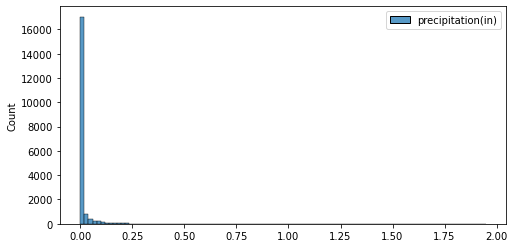

In [15]:
plt.figure(figsize = (8, 4))
sns.histplot(chi_df[['precipitation(in)']], bins = 100);

In [16]:
chi_df[['precipitation(in)']].fillna(0.01, inplace = True)

C:\Users\Mary\anaconda3\lib\site-packages\pandas\core\frame.py:4462: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [18]:
chi_df[['wind_chill(f)']].value_counts()

wind_chill(f)
 73.0            342
 31.0            336
 30.0            315
 72.0            304
 75.0            295
                ... 
 42.1              1
-18.3              1
-2.1               1
-3.1               1
-51.3              1
Length: 694, dtype: int64

In [19]:
chi_df[['wind_chill(f)']].value_counts().sort_index()

wind_chill(f)
-51.3             1
-50.5             1
-50.1             1
-48.5             1
-47.7             1
                 ..
 91.0            32
 92.0            35
 93.0            29
 94.0            26
 95.0             4
Length: 694, dtype: int64

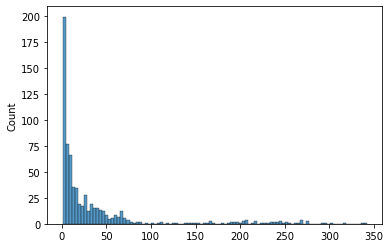

In [20]:
sns.histplot(chi_df[['wind_chill(f)']].value_counts().sort_index(), bins = 100);